In [3]:
import bayes_opt
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
from bayes_opt.util import load_logs

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn.gaussian_process.kernels import Matern, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import minmax_scale

import json

%matplotlib notebook

In [22]:
def formatName(name):
    return name.replace(" ", "_").replace("(", "").replace(")", "")

def fitAndPlot(gp, x_obs, y_obs, xrange, labels):
    gp.fit(x_obs, y_obs)
    mu, sigma = gp.predict(xrange, return_std=True)
    
    plt.figure(figsize=(15,8))
    plt.plot(xrange, mu, '--', label='prediction')
    xrange_rev = np.concatenate([xrange, xrange[::-1]]).ravel()
    muFill = np.concatenate([mu.ravel() - 1.9600 * sigma.ravel(), (mu.ravel() + 1.9600 * sigma.ravel())[::-1]])
    plt.fill(xrange_rev, muFill, alpha=.6, fc='c', ec='None', label='95% confidence interval')
    plt.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    plt.xlim((xrange[0], xrange[-1]))
    plt.xlabel(labels['xlabel'])
    plt.ylabel(labels['ylabel'])
    plt.title(labels['title'])
    plt.legend()
    plt.savefig("./figures/{}_{}".format(formatName(labels['title']), labels["xlabel"]))
    plt.show()
    

def fitAndPlot2(gp, x_obs, y_obs, targ_obs, grid, shape, pov, labels, showSamples):
    # fit and predict gp
    gp.fit(np.hstack((x_obs, y_obs)), targ_obs)
    mu, sigma = gp.predict(grid, return_std=True)
    print("grid shape: ", grid.shape)
    print("mu shape: ", mu.shape)
    mu = mu.reshape(shape, shape)
    print("mu reshaped: ", mu.shape)
    

In [38]:
def fitAndPlot3d(gp, x_obs, y_obs, targ_obs, grid, shape, pov, labels, showSamples):
    # fit and predict gp
    gp.fit(np.hstack((x_obs, y_obs)), targ_obs)
    mu, sigma = gp.predict(grid, return_std=True)
    mu = mu.reshape(shape, shape)
    # turn arrays into individual matrices (result is same as np.mesh)
    x_m = grid[:,0].reshape(shape, shape)
    y_m = grid[:,1].reshape(shape, shape)
    
    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(15,8))
    ax = plt.axes(projection='3d')
    ax.view_init(pov[0], pov[1])
    if showSamples:
        ax.scatter(x_obs, y_obs, targ_obs, s=50, c='black', alpha=1, label='observation')
    surf = ax.plot_surface(x_m, y_m, mu, rstride=1, cstride=1, cmap='viridis',
                    edgecolor='none', alpha=0.6, label='prediction')
    
    ax.set_title(labels['title']);
    ax.set_xlabel('\n\n'+labels['xlabel'])
    ax.set_ylabel('\n\n'+labels['ylabel'])
    ax.set_zlabel('\n\n'+labels['zlabel'])
    
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend()
    plt.tight_layout()
    plt.savefig("./figures/{}_{}".format(formatName(labels['title']), "3d"))
    plt.show()
    

def fitAndPlotContour(gp, x_obs, y_obs, targ_obs, grid, shape, labels, showSamples, annotate):
    # fit and predict gp
    gp.fit(np.hstack((x_obs, y_obs)), targ_obs)
    mu, sigma = gp.predict(grid, return_std=True)
    mu = mu.reshape(shape, shape)
    # turn arrays into individual matrices (result is same as np.mesh)
    x_m = grid[:,0].reshape(shape, shape)
    y_m = grid[:,1].reshape(shape, shape)
    
    plt.figure(figsize=(15,8))
    plt.contourf(x_m, y_m, mu, cmap='viridis')
    plt.colorbar(label=labels['zlabel']);
    if showSamples:
        plt.scatter(x_obs, y_obs, c='black', label='observations')
    if annotate:
        for i, val in enumerate(targ_obs):
            plt.annotate(s=round(val,3), xy=[x_obs[i], y_obs[i]])
    plt.rcParams.update({'font.size': 16})
    
    plt.title(labels['title'])
    plt.xlabel(labels['xlabel'])
    plt.ylabel(labels['ylabel'])
    plt.legend()
    
    # plt.tight_layout()
    plt.savefig("./figures/{}_{}".format(formatName(labels['title']), "contour"))
    plt.show()
    

### Plotting Strelka2

In [24]:
# complete data sampling into arrays
dataPoints = []
# with open('./bayes_logs_1549818579.json', 'r') as f:
#     dataPoints = list(map(json.loads, f.readlines()))
# add second data from second run
with open('./bayes_logs_strelkaDebug_1550770909.json', 'r') as f:
    dataPoints = list(map(json.loads, f.readlines()))

shape = 30
params = {
  'nCPUs': (2, 24),
  'totalMem': (8, 98)
}

cpu_obs = np.array([pt['params']['nCPUs'] for pt in dataPoints]).reshape(-1, 1)
mem_obs = np.array([pt['params']['totalMem'] for pt in dataPoints]).reshape(-1, 1)
targ_obs = np.array([pt['target'] for pt in dataPoints])

cpu_xrange = np.linspace(params['nCPUs'][0], params['nCPUs'][1], shape).reshape(-1, 1)
mem_xrange = np.linspace(params['totalMem'][0], params['totalMem'][1], shape).reshape(-1, 1)

grid_cart_prod = np.array([[x0, y0] for x0 in cpu_xrange for y0 in mem_xrange]).reshape(-1, 2)

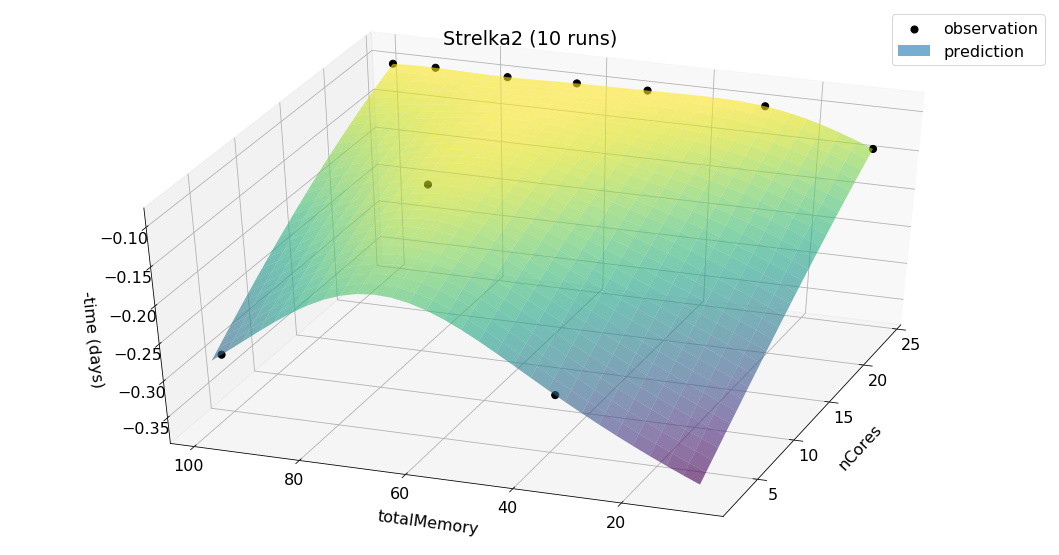

annotate: -0.11898969744642575, [11.1744841], [71.38855542]
annotate: -0.2699817859271058, [2.00251625], [34.60526639]
annotate: -0.27278709055097017, [2.], [96.]
annotate: -0.13843117032889968, [24.], [8.]
annotate: -0.09878389001720482, [24.], [98.]
annotate: -0.09668448339457865, [24.], [50.02524351]
annotate: -0.09950392950464178, [24.], [76.25183154]
annotate: -0.09986809860501024, [24.], [28.2503709]
annotate: -0.09760984851530305, [24.], [63.21544235]
annotate: -0.09777458558755893, [23.99555602], [89.87530875]


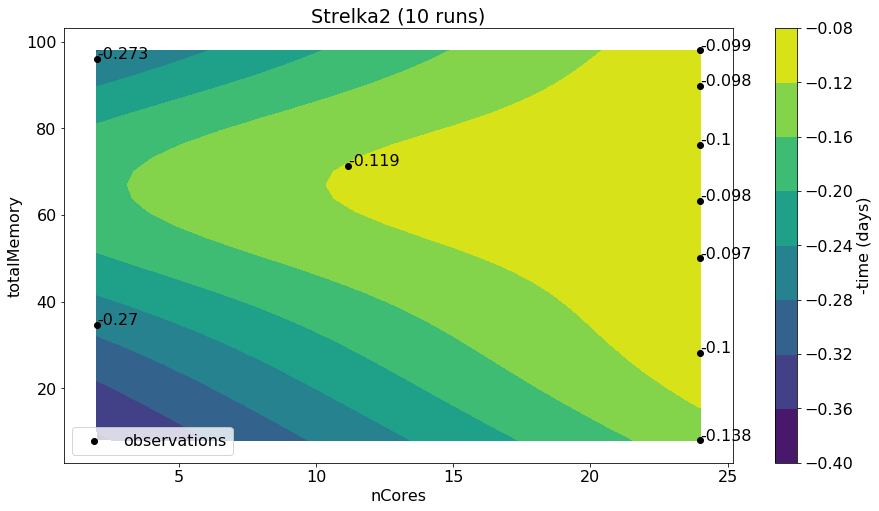

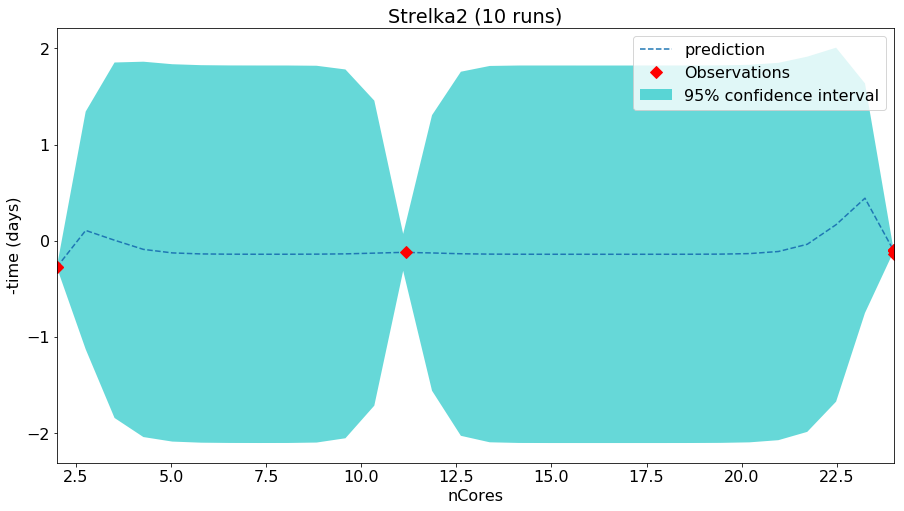

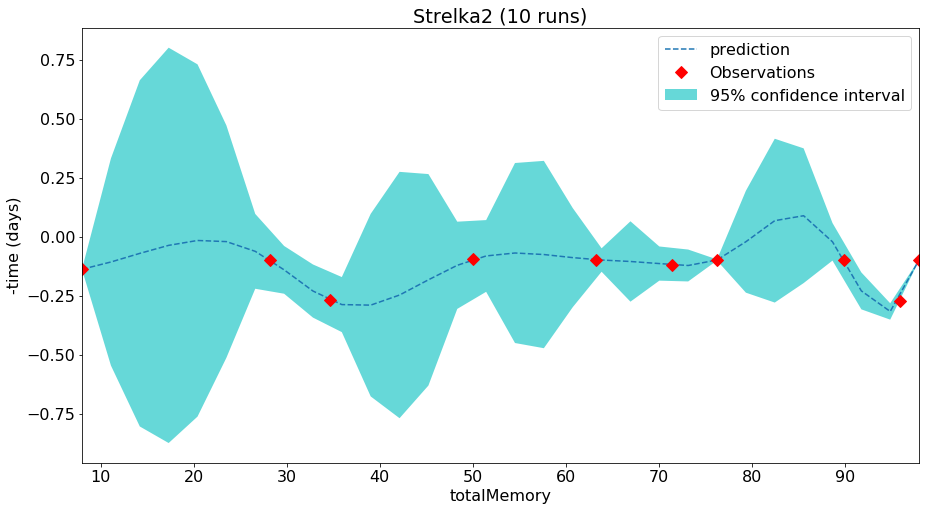

In [25]:
my_gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1e-6,
    normalize_y=True,
    n_restarts_optimizer=25,
    random_state=bayes_opt.util.ensure_rng(None),
)
title = 'Strelka2 ({} runs)'.format(len(cpu_obs))

labels = {
    'title': title,
    'xlabel': 'nCores',
    'ylabel': 'totalMemory',
    'zlabel': '-time (days)'
}

strelka_df = pd.DataFrame(np.hstack([cpu_obs, mem_obs, targ_obs.reshape(-1, 1)*-1*24*60]), columns=['ncpus', 'totalMem', 'timeMinutes'])
strelka_df.to_csv(title.replace(" ", "_").replace("(", "").replace(")", "")+".csv", index=False)

fitAndPlot3d(my_gp, cpu_obs, mem_obs, targ_obs, grid_cart_prod, shape, (40, 200), labels, True)
fitAndPlotContour(my_gp, cpu_obs, mem_obs, targ_obs, grid_cart_prod, shape, labels, True, True)
fitAndPlot(my_gp, cpu_obs, targ_obs, cpu_xrange, {'xlabel': 'nCores', 'ylabel': '-time (days)', 'title': title})
fitAndPlot(my_gp, mem_obs, targ_obs, mem_xrange, {'xlabel': 'totalMemory', 'ylabel': '-time (days)', 'title': title})

grid shape:  (900, 2)
mu shape:  (900,)
mu reshaped:  (30, 30)


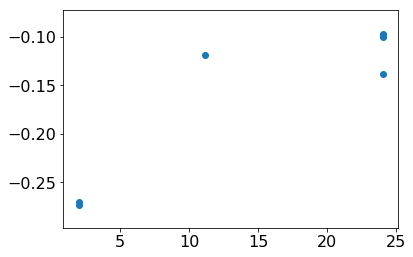

In [26]:
# considering if I should be fitting both variables before plotting univariate....
# Not convinced it actually makes sense. I feel like you could just fit it univariate then plot
# but then I get a weird graph sometimes (e.g. when strelka sampled a lot of points at 24 cpus it gets ugly)
plt.scatter(cpu_obs, targ_obs)
fitAndPlot2(my_gp, cpu_obs, mem_obs, targ_obs, grid_cart_prod, shape, (40, 200), labels, True)

###  Plotting platypus

In [48]:
# complete data sampling into arrays
dataPoints = []
with open('./bayes_logs_platypus_1551116723.json', 'r') as f:
    dataPoints = list(map(json.loads, f.readlines()))

params = {
    "nCPU": (4, 24),
    "bufferSize": (1, 4) # 100000, 400000
}
shape = 30

pcpu_obs = np.array([pt['params']['nCPU'] for pt in dataPoints]).reshape(-1, 1)
pbuff_obs = np.array([pt['params']['bufferSize'] for pt in dataPoints]).reshape(-1, 1) / 100000
ptarg_obs = np.array([pt['target'] for pt in dataPoints])

pcpu_xrange = np.linspace(params['nCPU'][0], params['nCPU'][1], shape).reshape(-1, 1)
pbuff_xrange = np.linspace(params['bufferSize'][0], params['bufferSize'][1], shape).reshape(-1, 1)

# calculate cartesian product of variables ORDER MATTERS!
pgrid_cart_prod = np.array([[x0, y0] for x0 in pcpu_xrange for y0 in pbuff_xrange]).reshape(-1, 2)

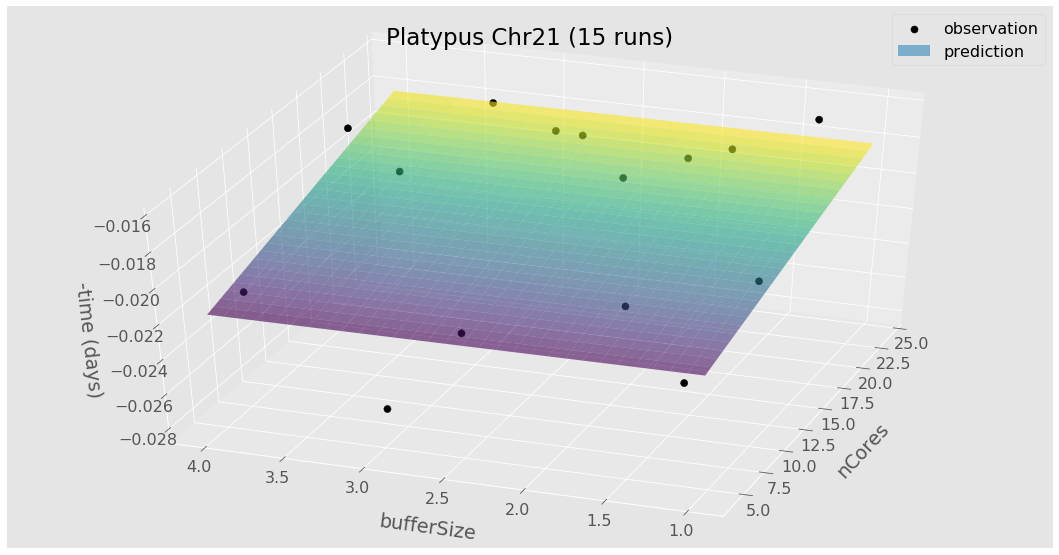

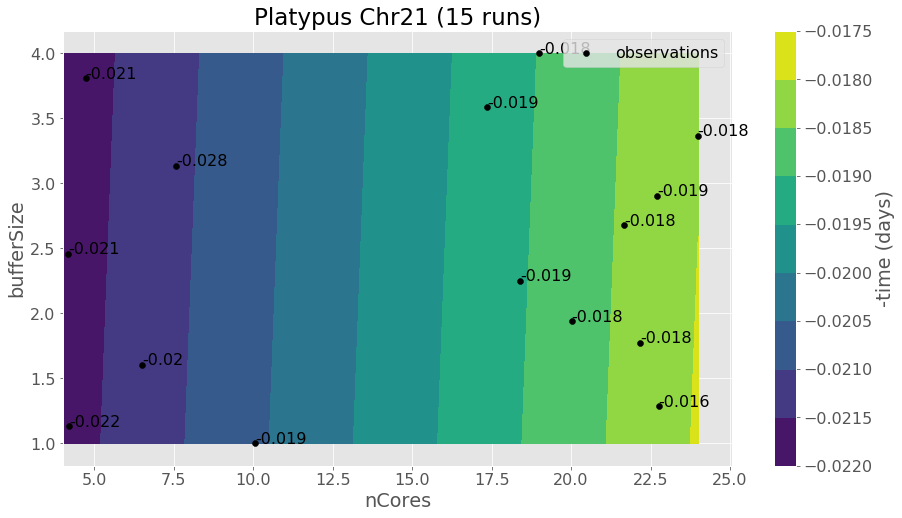

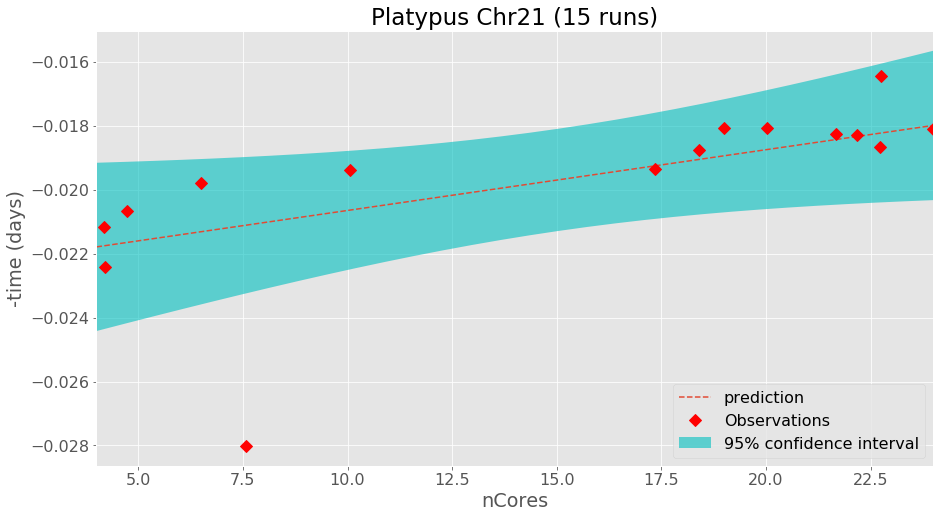

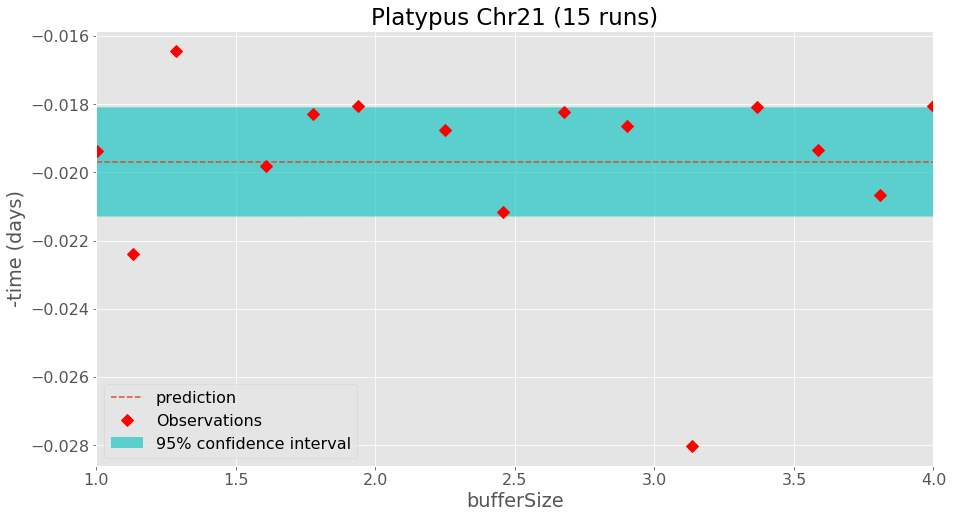

In [49]:
my_gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1e-5,
    normalize_y=True,
    n_restarts_optimizer=25,
    random_state=bayes_opt.util.ensure_rng(None),
)
title = 'Platypus Chr21 ({} runs)'.format(len(pcpu_obs))
labels = {
    'title': title,
    'xlabel': 'nCores',
    'ylabel': 'bufferSize',
    'zlabel': '-time (days)'
}

platypus_df = pd.DataFrame(np.hstack([pcpu_obs, pbuff_obs, ptarg_obs.reshape(-1, 1)*-1*24*60]), columns=['ncpus', 'bufferSize', 'timeMinutes'])
platypus_df.to_csv(title+".csv", index=False)

fitAndPlot3d(my_gp, pcpu_obs, pbuff_obs, ptarg_obs, pgrid_cart_prod, shape, (40, 200), labels, True)
fitAndPlotContour(my_gp, pcpu_obs, pbuff_obs, ptarg_obs, pgrid_cart_prod, shape, labels, True, True)
fitAndPlot(my_gp, pcpu_obs, ptarg_obs, pcpu_xrange, {'xlabel': 'nCores', 'ylabel': '-time (days)', 'title': title})
fitAndPlot(my_gp, pbuff_obs, ptarg_obs, pbuff_xrange, {'xlabel': 'bufferSize', 'ylabel': '-time (days)', 'title': title})


## Plotting GATK3

In [29]:
# complete data sampling into arrays
dataPoints = []
with open('./bayes_logs_gatk3_1551162543.json', 'r') as f:
    dataPoints = list(map(json.loads, f.readlines()))

params = {
    "nct": (8, 24),
    "threadsGC": (8, 24)
}
shape = 30

nct_obs = np.array([pt['params']['nct'] for pt in dataPoints]).reshape(-1, 1)
tgc_obs = np.array([pt['params']['threadsGC'] for pt in dataPoints]).reshape(-1, 1)
gatTarg_obs = np.array([pt['target'] for pt in dataPoints])

nct_xrange = np.linspace(params['nct'][0], params['nct'][1], shape).reshape(-1, 1)
tgc_xrange = np.linspace(params['threadsGC'][0], params['threadsGC'][1], shape).reshape(-1, 1)

# calculate cartesian product of variables ORDER MATTERS!
gatGrid_cart_prod = np.array([[x0, y0] for x0 in nct_xrange for y0 in tgc_xrange]).reshape(-1, 2)

/anaconda3/envs/parsl_py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.15909184e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 7, 'warnflag': 2}
  ConvergenceWarning)


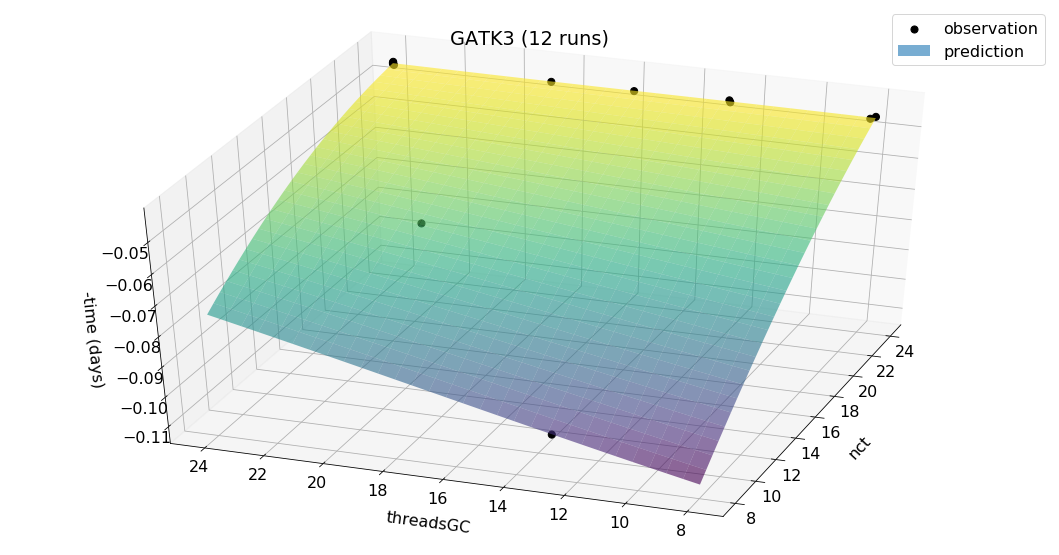

annotate: -0.06250480138041355, [14.67235208], [19.5251919]
annotate: -0.10052032164953373, [8.00183], [12.83732116]
annotate: -0.044730246569271444, [24.], [8.]
annotate: -0.04464120453706494, [24.], [24.]
annotate: -0.04511489470523817, [23.9956888], [15.91289646]
annotate: -0.0450116624434789, [24.], [24.]
annotate: -0.04548293333638597, [23.99204189], [8.17210673]
annotate: -0.04512238883861789, [23.9984567], [18.66909504]
annotate: -0.04468572266123913, [23.99826736], [12.77312292]
annotate: -0.044288721288795824, [23.96933936], [23.97621078]
annotate: -0.045350728644816964, [23.99986299], [23.96682559]
annotate: -0.045248105614273636, [23.99274889], [12.73975438]


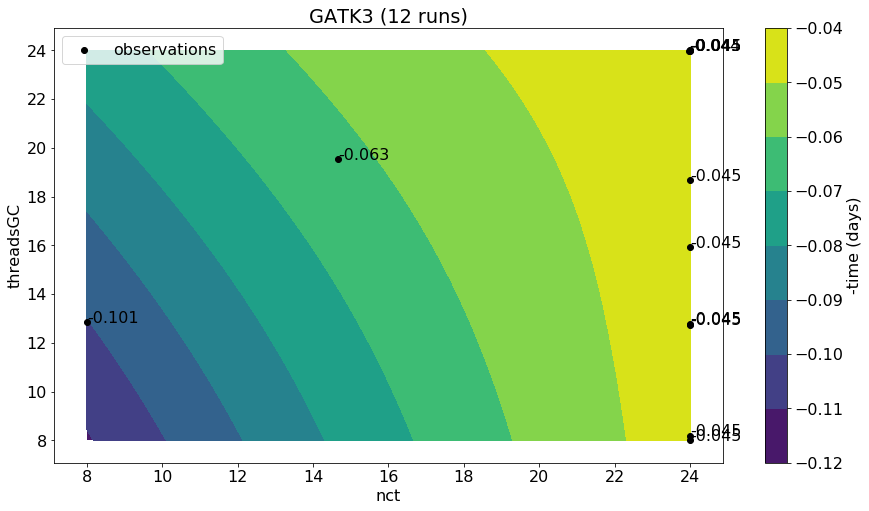

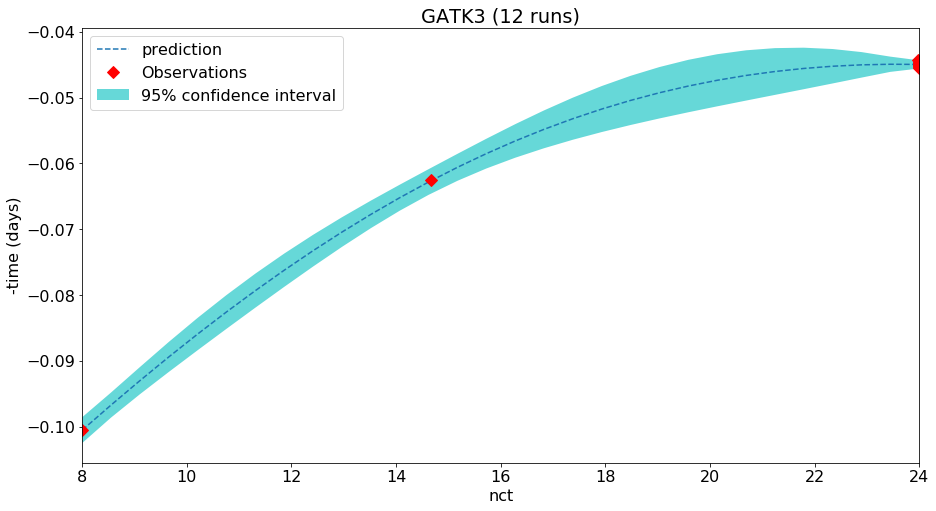

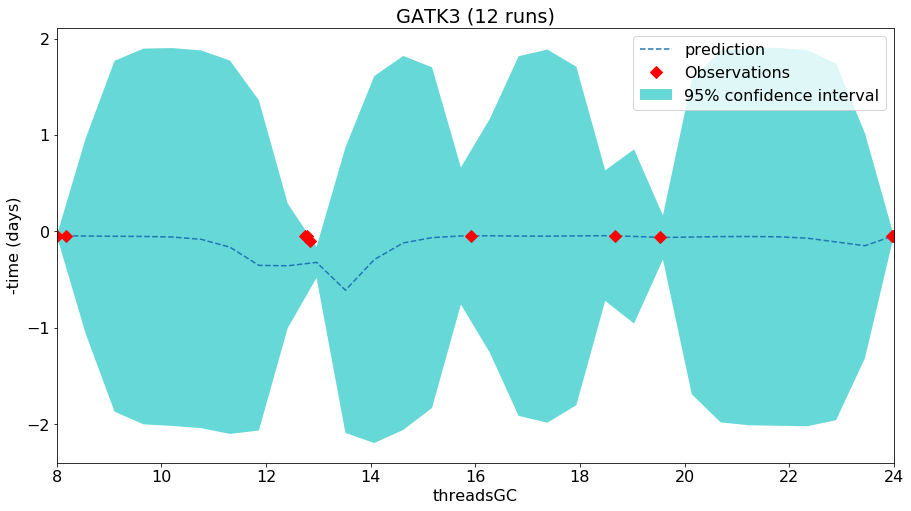

In [30]:
gatk3_gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1e-6,
    normalize_y=True,
    n_restarts_optimizer=25,
    random_state=bayes_opt.util.ensure_rng(None),
)
title = 'GATK3 ({} runs)'.format(len(nct_obs))
gatk3_labels = {
    'title': title,
    'xlabel': 'nct',
    'ylabel': 'threadsGC',
    'zlabel': '-time (days)'
}

gatk_df = pd.DataFrame(np.hstack([nct_obs, tgc_obs, gatTarg_obs.reshape(-1, 1)*-1*24*60]), columns=['nct', 'threadsGC', 'timeMinutes'])
gatk_df.to_csv(title.replace(" ", "_").replace("(", "").replace(")", "")+".csv", index=False)

fitAndPlot3d(gatk3_gp, nct_obs, tgc_obs, gatTarg_obs, gatGrid_cart_prod, shape, (40, 200), gatk3_labels, True)
fitAndPlotContour(gatk3_gp, nct_obs, tgc_obs, gatTarg_obs, gatGrid_cart_prod, shape, gatk3_labels, True, True)
fitAndPlot(gatk3_gp, nct_obs, gatTarg_obs, nct_xrange, {'xlabel': 'nct', 'ylabel': '-time (days)', 'title': title})
fitAndPlot(gatk3_gp, tgc_obs, gatTarg_obs, tgc_xrange, {'xlabel': 'threadsGC', 'ylabel': '-time (days)', 'title': title})

## Plotting Platypus - Grid search

In [31]:
# complete data sampling into arrays
dataPoints = []
gs_df = pd.read_csv("my_logs_platypusGrid_1551207188.csv")

params = {
    "nCPU": (4, 24),
    "bufferSize": (1, 4)
}
shape = 30

gs_pcpu_obs = np.array(gs_df['nCPU']).reshape(-1, 1)
gs_pbuff_obs = np.array(gs_df['bufferSize']).reshape(-1, 1) / 100000
gs_ptarg_obs = np.array(gs_df['negDays'])

gs_pcpu_xrange = np.linspace(params['nCPU'][0], params['nCPU'][1], shape).reshape(-1, 1)
gs_pbuff_xrange = np.linspace(params['bufferSize'][0], params['bufferSize'][1], shape).reshape(-1, 1)

# calculate cartesian product of variables ORDER MATTERS!
gs_pgrid_cart_prod = np.array([[x0, y0] for x0 in gs_pcpu_xrange for y0 in gs_pbuff_xrange]).reshape(-1, 2)

/anaconda3/envs/parsl_py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.93806708e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


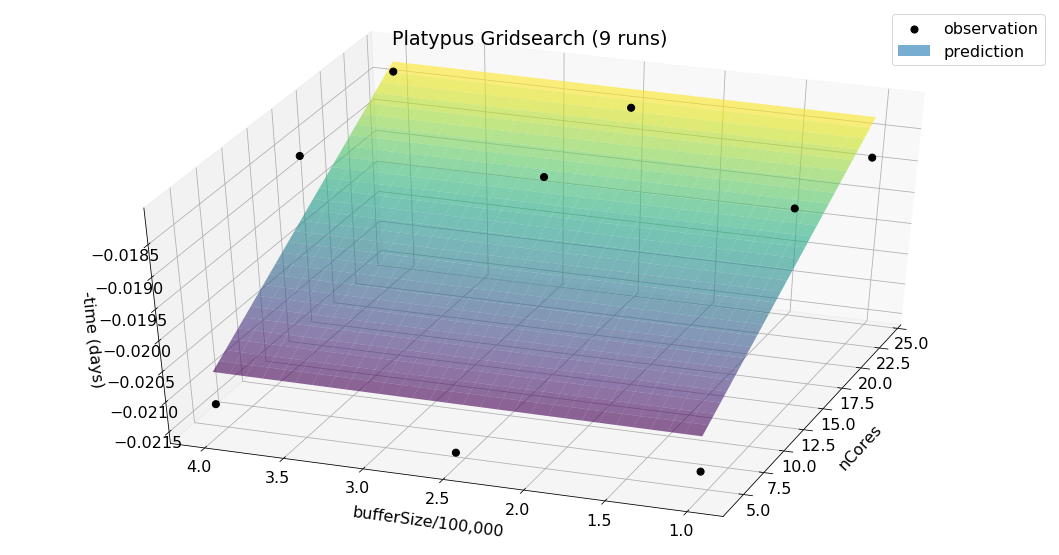

annotate: -0.021239378507490508, [4.], [1.]
annotate: -0.0214562973573252, [4.], [2.5]
annotate: -0.02116478046057401, [4.], [4.]
annotate: -0.01840673786622507, [14.], [1.]
annotate: -0.018374228513351198, [14.], [2.5]
annotate: -0.01848808201374831, [14.], [4.]
annotate: -0.01883815523650911, [24.], [1.]
annotate: -0.018489965343916857, [24.], [2.5]
annotate: -0.0183446049000378, [24.], [4.]


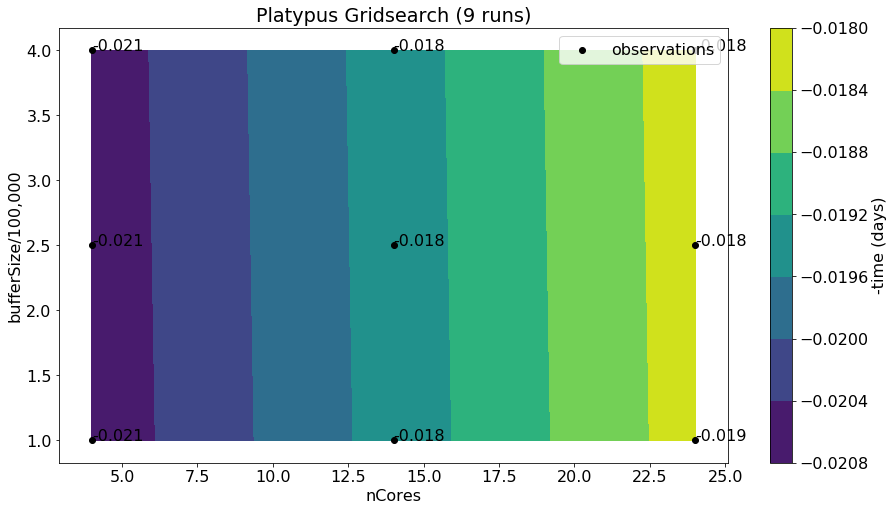

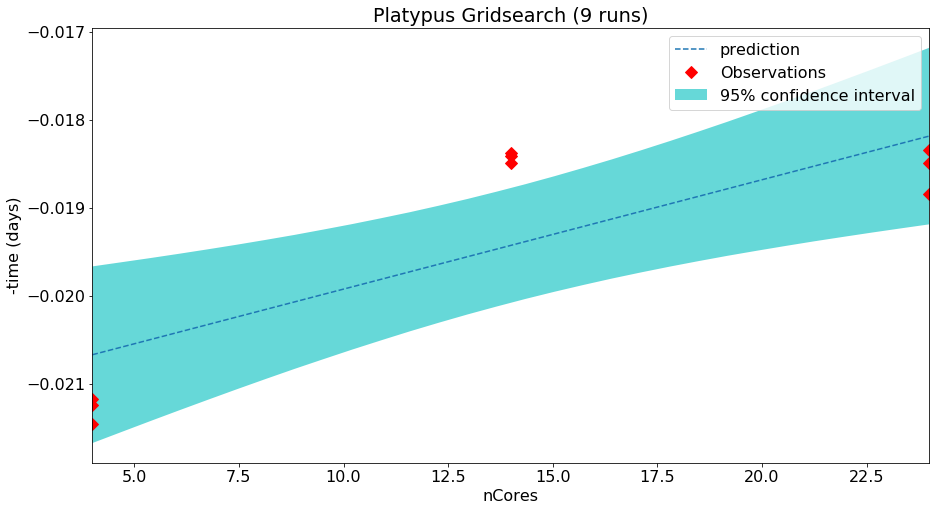

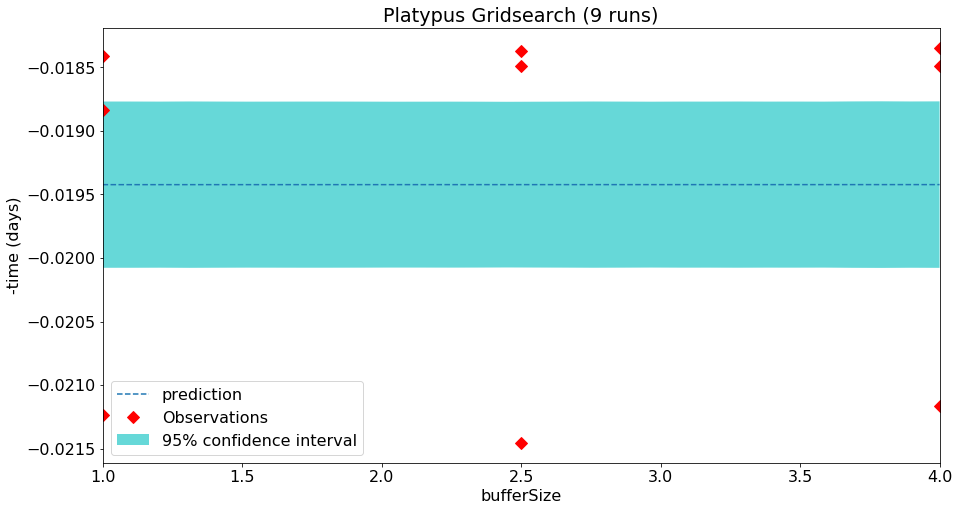

In [32]:
# plt.scatter(pcpu_obs, ptarg_obs)
# plt.xlim(4,24)
# plt.ylim(-0.024, -0.015)
my_gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1e-6,
    normalize_y=True,
    n_restarts_optimizer=25,
    random_state=bayes_opt.util.ensure_rng(None),
)
title = 'Platypus Gridsearch ({} runs)'.format(len(gs_pcpu_obs))
labels = {
    'title': title,
    'xlabel': 'nCores',
    'ylabel': 'bufferSize/100,000',
    'zlabel': '-time (days)'
}

platypus_df = pd.DataFrame(np.hstack([gs_pcpu_obs, gs_pbuff_obs, gs_ptarg_obs.reshape(-1, 1)*-1*24*60]), columns=['ncpus', 'bufferSize', 'timeMinutes'])
platypus_df.to_csv(title.replace(" ", "_").replace("(", "").replace(")", "")+".csv", index=False)

fitAndPlot3d(my_gp, gs_pcpu_obs, gs_pbuff_obs, gs_ptarg_obs, gs_pgrid_cart_prod, shape, (40, 200), labels, True)
fitAndPlotContour(my_gp, gs_pcpu_obs, gs_pbuff_obs, gs_ptarg_obs, gs_pgrid_cart_prod, shape, labels, True, True)
fitAndPlot(my_gp, gs_pcpu_obs, gs_ptarg_obs, gs_pcpu_xrange, {'xlabel': 'nCores', 'ylabel': '-time (days)', 'title': title})
fitAndPlot(my_gp, gs_pbuff_obs, gs_ptarg_obs, gs_pbuff_xrange, {'xlabel': 'bufferSize', 'ylabel': '-time (days)', 'title': title})

## Plotting Platypus gridsearch vs bayesopt results

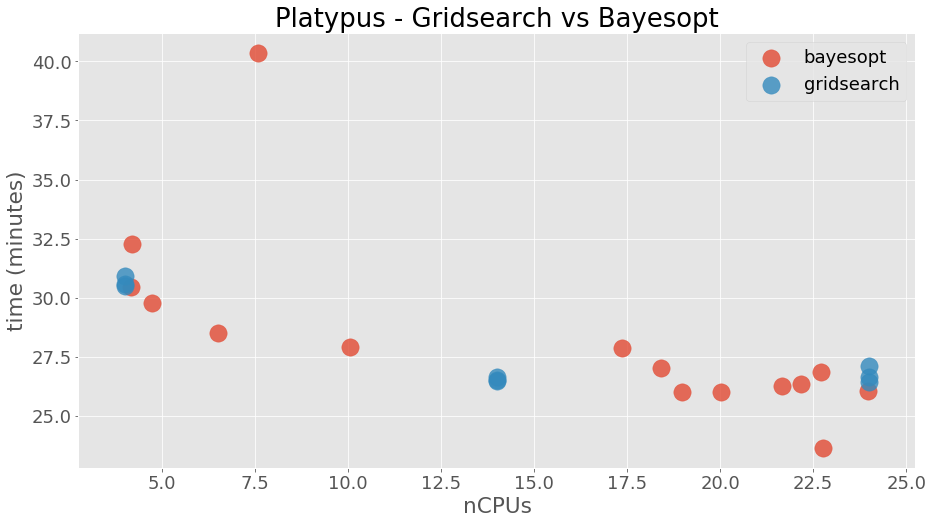

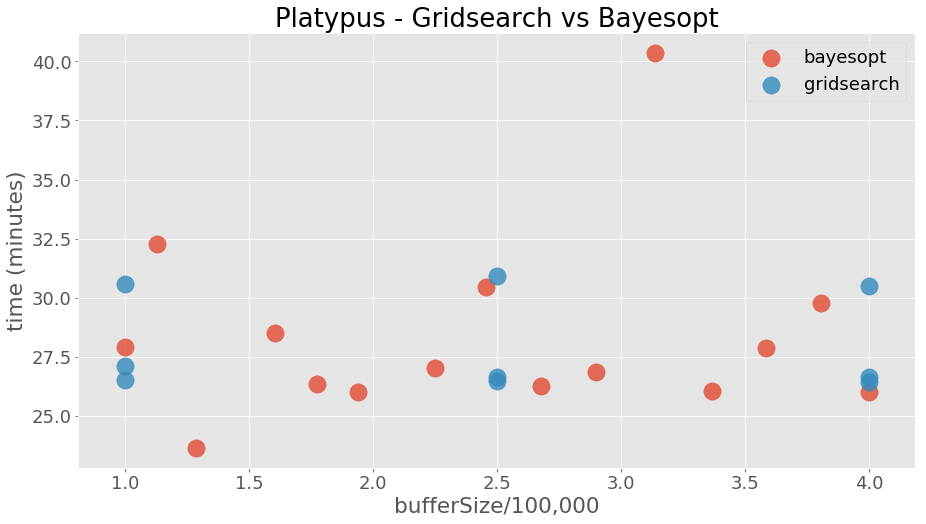

In [33]:
matplotlib.style.use('ggplot')
def plotComparison(a_x, a_y, b_x, b_y, labels):
    plt.rc('font', size=18)
    plt.figure(figsize=(15,8))
    plt.title(labels['title'])
    plt.scatter(a_x, a_y, label=labels['a'], alpha=0.8, s=300)
    plt.scatter(b_x, b_y, label=labels['b'], alpha=0.8, s=300)
    plt.legend(loc="upper right")
    plt.xlabel(labels['x'])
    plt.ylabel(labels['y'])

cpuLabels = {
    'title': 'Platypus - Gridsearch vs Bayesopt',
    'a': 'bayesopt',
    'b': 'gridsearch',
    'x': 'nCPUs',
    'y': 'time (minutes)'
}
buffLabels = {
    'title': 'Platypus - Gridsearch vs Bayesopt',
    'a': 'bayesopt',
    'b': 'gridsearch',
    'x': 'bufferSize/100,000',
    'y': 'time (minutes)'
}
plotComparison(pcpu_obs, ptarg_obs*24*60*-1, gs_pcpu_obs, gs_ptarg_obs*24*60*-1, cpuLabels)
plotComparison(pbuff_obs, ptarg_obs*24*60*-1, gs_pbuff_obs, gs_ptarg_obs*24*60*-1, buffLabels)

## Plotting Platypus - Chr1

In [50]:
# complete data sampling into arrays
dataPoints = []
with open('./bayes_logs_platypusChr1_1551373394.json', 'r') as f:
    dataPoints = list(map(json.loads, f.readlines()))

params = {
    "nCPU": (4, 24),
    "bufferSize": (1, 4) # 100000, 400000
}
shape = 100

pcpu_obs = np.array([pt['params']['nCPU'] for pt in dataPoints]).reshape(-1, 1)
pbuff_obs = np.array([pt['params']['bufferSize'] for pt in dataPoints]).reshape(-1, 1) / 100000
ptarg_obs = np.array([pt['target'] for pt in dataPoints])

pcpu_xrange = np.linspace(params['nCPU'][0], params['nCPU'][1], shape).reshape(-1, 1)
pbuff_xrange = np.linspace(params['bufferSize'][0], params['bufferSize'][1], shape).reshape(-1, 1)

# calculate cartesian product of variables ORDER MATTERS!
pgrid_cart_prod = np.array([[x0, y0] for x0 in pcpu_xrange for y0 in pbuff_xrange]).reshape(-1, 2)

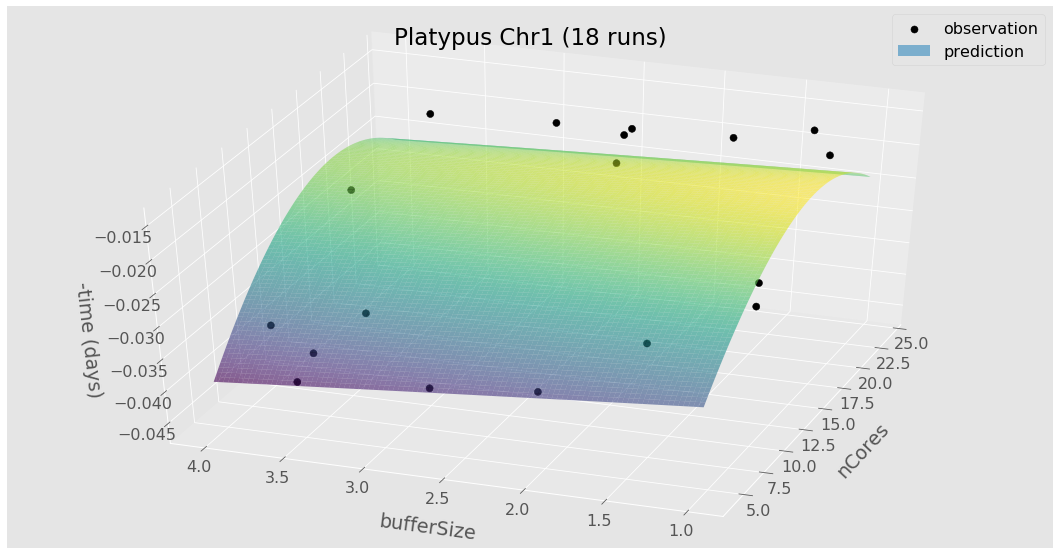

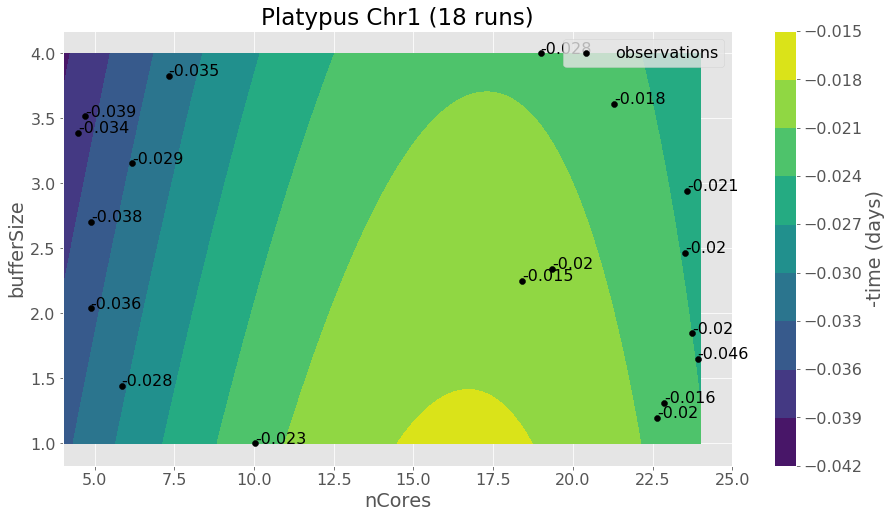

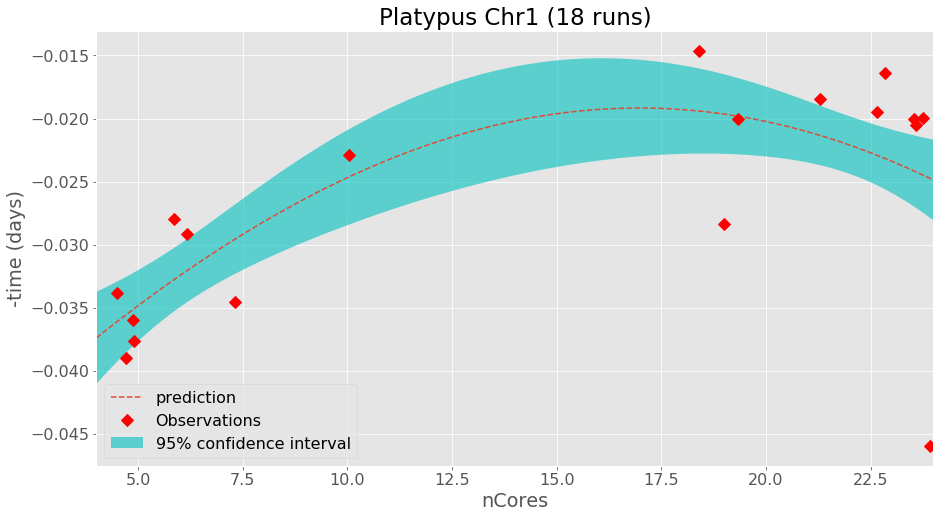

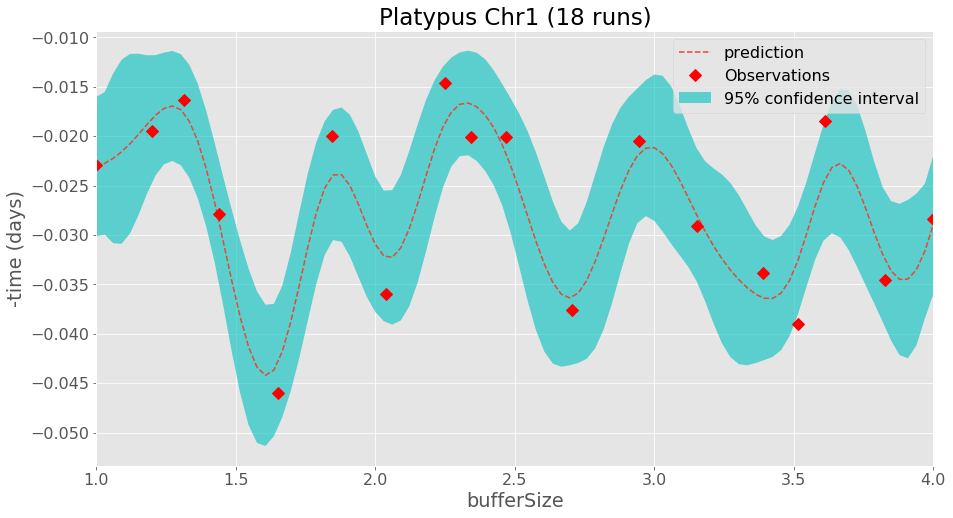

In [52]:
my_gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1.3e-5,
    normalize_y=True,
    n_restarts_optimizer=25,
    random_state=bayes_opt.util.ensure_rng(None),
)
title = 'Platypus Chr1 ({} runs)'.format(len(pcpu_obs))
labels = {
    'title': title,
    'xlabel': 'nCores',
    'ylabel': 'bufferSize',
    'zlabel': '-time (days)'
}

platypus_df = pd.DataFrame(np.hstack([pcpu_obs, pbuff_obs, ptarg_obs.reshape(-1, 1)*-1*24*60]), columns=['ncpus', 'bufferSize', 'timeMinutes'])
platypus_df.to_csv(title.replace(" ", "_").replace("(", "").replace(")", "")+".csv", index=False)

fitAndPlot3d(my_gp, pcpu_obs, pbuff_obs, ptarg_obs, pgrid_cart_prod, shape, (40, 200), labels, True)
fitAndPlotContour(my_gp, pcpu_obs, pbuff_obs, ptarg_obs, pgrid_cart_prod, shape, labels, True, True)
fitAndPlot(my_gp, pcpu_obs, ptarg_obs, pcpu_xrange, {'xlabel': 'nCores', 'ylabel': '-time (days)', 'title': title})
fitAndPlot(my_gp, pbuff_obs, ptarg_obs, pbuff_xrange, {'xlabel': 'bufferSize', 'ylabel': '-time (days)', 'title': title})